In [ ]:
# Test csv output from Altair pipeline code

# Created 2019 Nov 18 by E.S.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data/test_csv_file_all_iterations_20200210_run_02.csv")

In [3]:
df

,Unnamed: 0,ampl_linear_norm,ampl_linear_norm_0,angle_deg,host_ampl,inject_iteration,last_ampl_step_signed,last_ampl_step_unsigned,noise,rad_asec,rad_pix,s2n,signal
0,0,0.00100,0.001,120.0,25968.365151,0,NaN,NaN,12.310971,0.2,NaN,3.850906,47.408389
1,1,0.00100,0.001,0.0,25968.365151,0,NaN,NaN,2.235944,1.4,NaN,12.140274,27.144977
2,2,0.00100,0.001,240.0,25968.365151,0,NaN,NaN,2.188794,1.6,NaN,12.716245,27.833238
3,3,0.00100,0.001,0.0,25968.365151,0,NaN,NaN,3.439627,0.6,NaN,6.736536,23.171170
4,4,0.00100,0.001,0.0,25968.365151,0,NaN,NaN,3.820972,0.3,NaN,5.094128,19.464518
...,...,...,...,...,...,...,...,...,...,...,...,...,...
914,914,0.00364,0.001,0.0,25968.365151,51,-5.000000e-08,5.000000e-08,11.550387,0.3,28.037383,5.000015,57.752107
915,915,0.00364,0.001,0.0,25968.365151,52,-5.000000e-08,5.000000e-08,11.550323,0.3,28.037383,4.999980,57.751385
916,916,0.00364,0.001,0.0,25968.365151,53,1.000000e-08,1.000000e-08,11.550336,0.3,28.037383,4.999987,57.751529
917,917,0.00364,0.001,0.0,25968.365151,54,1.000000e-08,1.000000e-08,11.550349,0.3,28.037383,4.999994,57.751673


In [4]:
# separate by radial position

test_rad020_allaz = df.where(np.logical_and(df["rad_asec"] == 0.20,df["ampl_linear_norm_0"] == 0.001))
test_rad100_allaz = df.where(np.logical_and(df["rad_asec"] == 1.00,df["ampl_linear_norm_0"] == 0.001))
test_rad180_allaz = df.where(np.logical_and(df["rad_asec"] == 1.80,df["ampl_linear_norm_0"] == 0.001))

In [5]:
# separate further by radial and azimuthal position

test_rad020_az000 = df.where(np.logical_and(test_rad020_allaz["rad_asec"] == 0.20,
                                            test_rad020_allaz["angle_deg"] == 0))
test_rad020_az120 = df.where(np.logical_and(test_rad020_allaz["rad_asec"] == 0.20,
                                            test_rad020_allaz["angle_deg"] == 120))
test_rad020_az240 = df.where(np.logical_and(test_rad020_allaz["rad_asec"] == 0.20,
                                            test_rad020_allaz["angle_deg"] == 240))

test_rad100_az000 = df.where(np.logical_and(test_rad100_allaz["rad_asec"] == 1.00,
                                            test_rad100_allaz["angle_deg"] == 0))
test_rad100_az120 = df.where(np.logical_and(test_rad100_allaz["rad_asec"] == 1.00,
                                            test_rad100_allaz["angle_deg"] == 120))
test_rad100_az240 = df.where(np.logical_and(test_rad100_allaz["rad_asec"] == 1.00,
                                            test_rad100_allaz["angle_deg"] == 240))

test_rad180_az000 = df.where(np.logical_and(test_rad180_allaz["rad_asec"] == 1.80,
                                            test_rad180_allaz["angle_deg"] == 0))
test_rad180_az120 = df.where(np.logical_and(test_rad180_allaz["rad_asec"] == 1.80,
                                            test_rad180_allaz["angle_deg"] == 120))
test_rad180_az240 = df.where(np.logical_and(test_rad180_allaz["rad_asec"] == 1.80,
                                            test_rad180_allaz["angle_deg"] == 240))

In [6]:
df["angle_deg"].drop_duplicates()

0    120.0
1      0.0
2    240.0
Name: angle_deg, dtype: float64

# Amplitude convergence

/Users/nyumbani/anaconda3/envs/py366/lib/python3.6/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


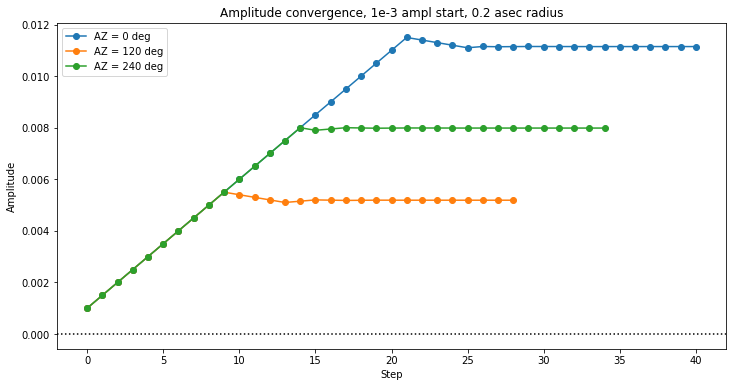

In [7]:
f, (ax1) = plt.subplots(1, 1, figsize=(12,6), sharey=True)

ax1.axhline(y=0, linestyle=":", color="k")
ax1.plot(test_rad020_az000["inject_iteration"].dropna(),
         test_rad020_az000["ampl_linear_norm"].dropna(), marker='o', label="AZ = 0 deg")
ax1.plot(test_rad020_az120["inject_iteration"].dropna(),
         test_rad020_az120["ampl_linear_norm"].dropna(), marker='o', label="AZ = 120 deg")
ax1.plot(test_rad020_az240["inject_iteration"].dropna(),
         test_rad020_az240["ampl_linear_norm"].dropna(), marker='o', label="AZ = 240 deg")
#ax1.set_ylim([-0.001,0.005])
#ax1.set_xlim([-1,12])
ax1.set_xlabel("Step")
ax1.set_ylabel("Amplitude")
ax1.set_title("Amplitude convergence, 1e-3 ampl start, 0.2 asec radius")
ax1.legend()

f.show()
plt.savefig("junk.pdf")

/Users/nyumbani/anaconda3/envs/py366/lib/python3.6/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


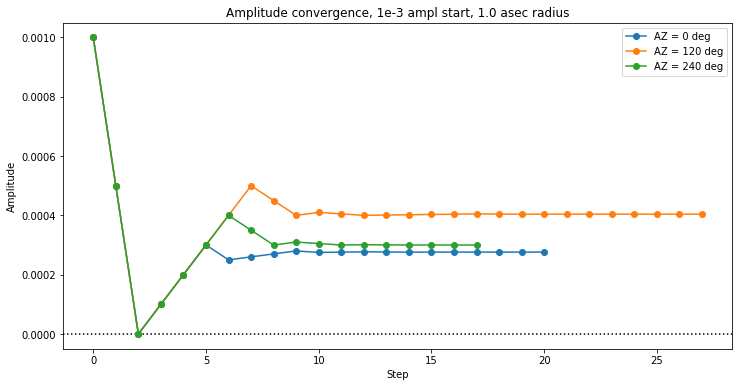

In [8]:
f, (ax1) = plt.subplots(1, 1, figsize=(12,6), sharey=True)

ax1.axhline(y=0, linestyle=":", color="k")
ax1.plot(test_rad100_az000["inject_iteration"].dropna(),
         test_rad100_az000["ampl_linear_norm"].dropna(), marker='o', label="AZ = 0 deg")
ax1.plot(test_rad100_az120["inject_iteration"].dropna(),
         test_rad100_az120["ampl_linear_norm"].dropna(), marker='o', label="AZ = 120 deg")
ax1.plot(test_rad100_az240["inject_iteration"].dropna(),
         test_rad100_az240["ampl_linear_norm"].dropna(), marker='o', label="AZ = 240 deg")
#ax1.set_ylim([-0.001,0.005])
#ax1.set_xlim([-1,12])
ax1.set_xlabel("Step")
ax1.set_ylabel("Amplitude")
ax1.set_title("Amplitude convergence, 1e-3 ampl start, 1.0 asec radius")
ax1.legend()

f.show()
plt.savefig("junk.pdf")

/Users/nyumbani/anaconda3/envs/py366/lib/python3.6/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


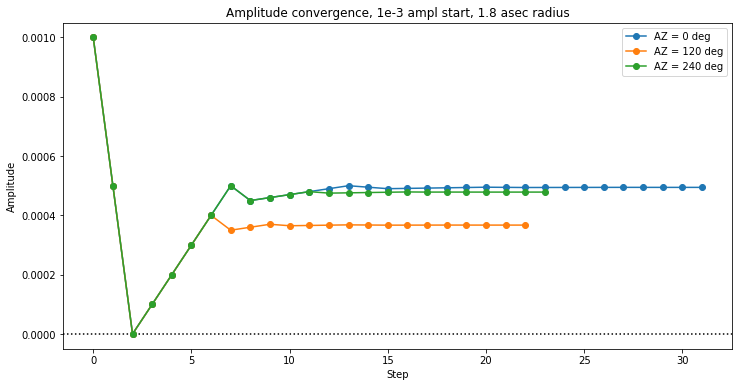

In [24]:
f, (ax1) = plt.subplots(1, 1, figsize=(12,6), sharey=True)

ax1.axhline(y=0, linestyle=":", color="k")
ax1.plot(test_rad180_az000["inject_iteration"].dropna(),
         test_rad180_az000["ampl_linear_norm"].dropna(), marker='o', label="AZ = 0 deg")
ax1.plot(test_rad180_az120["inject_iteration"].dropna(),
         test_rad180_az120["ampl_linear_norm"].dropna(), marker='o', label="AZ = 120 deg")
ax1.plot(test_rad180_az240["inject_iteration"].dropna(),
         test_rad180_az240["ampl_linear_norm"].dropna(), marker='o', label="AZ = 240 deg")
#ax1.set_ylim([-0.001,0.005])
#ax1.set_xlim([-1,12])
ax1.set_xlabel("Step")
ax1.set_ylabel("Amplitude")
ax1.set_title("Amplitude convergence, 1e-3 ampl start, 1.8 asec radius")
ax1.legend()

f.show()
plt.savefig("junk.pdf")

# S/N convergence

/Users/nyumbani/anaconda3/envs/py366/lib/python3.6/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


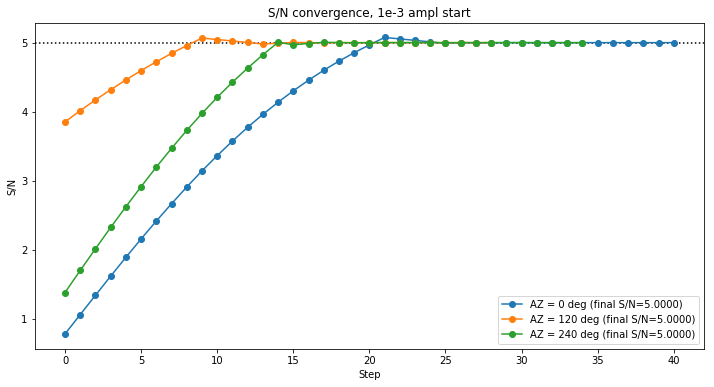

In [31]:
f, (ax1) = plt.subplots(1, 1, figsize=(12,6), sharey=True)

ax1.axhline(y=5, linestyle=":", color="k")
ax1.plot(test_rad020_az000["inject_iteration"].dropna(),test_rad020_az000["s2n"].dropna(), marker='o', 
         label="AZ = 0 deg (final S/N=5.0000)")
ax1.plot(test_rad020_az120["inject_iteration"].dropna(),test_rad020_az120["s2n"].dropna(), marker='o', 
         label="AZ = 120 deg (final S/N=5.0000)")
ax1.plot(test_rad020_az240["inject_iteration"].dropna(),test_rad020_az240["s2n"].dropna(), marker='o', 
         label="AZ = 240 deg (final S/N=5.0000)")
#ax1.set_ylim([-0.001,0.005])
ax1.set_xlabel("Step")
ax1.set_ylabel("S/N")
ax1.set_title("S/N convergence, 1e-3 ampl start")
ax1.legend()

f.show()
plt.savefig("junk.pdf")

/Users/nyumbani/anaconda3/envs/py366/lib/python3.6/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


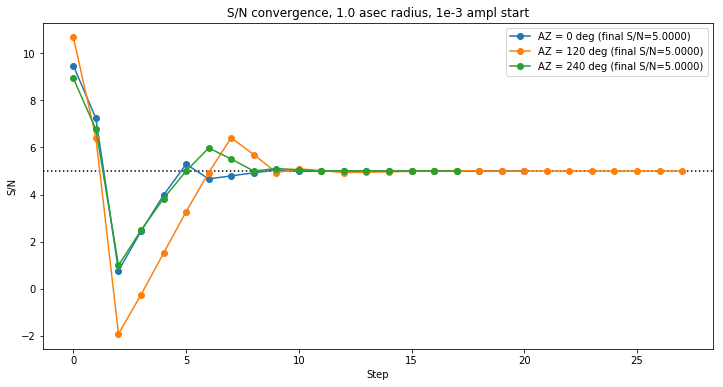

In [34]:
f, (ax1) = plt.subplots(1, 1, figsize=(12,6), sharey=True)

ax1.axhline(y=5, linestyle=":", color="k")
ax1.plot(test_rad100_az000["inject_iteration"].dropna(),test_rad100_az000["s2n"].dropna(), marker='o', 
         label="AZ = 0 deg (final S/N=5.0000)")
ax1.plot(test_rad100_az120["inject_iteration"].dropna(),test_rad100_az120["s2n"].dropna(), marker='o', 
         label="AZ = 120 deg (final S/N=5.0000)")
ax1.plot(test_rad100_az240["inject_iteration"].dropna(),test_rad100_az240["s2n"].dropna(), marker='o', 
         label="AZ = 240 deg (final S/N=5.0000)")
#ax1.set_ylim([-0.001,0.005])
ax1.set_xlabel("Step")
ax1.set_ylabel("S/N")
ax1.set_title("S/N convergence, 1.0 asec radius, 1e-3 ampl start")
ax1.legend()

f.show()
plt.savefig("junk.pdf")

/Users/nyumbani/anaconda3/envs/py366/lib/python3.6/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


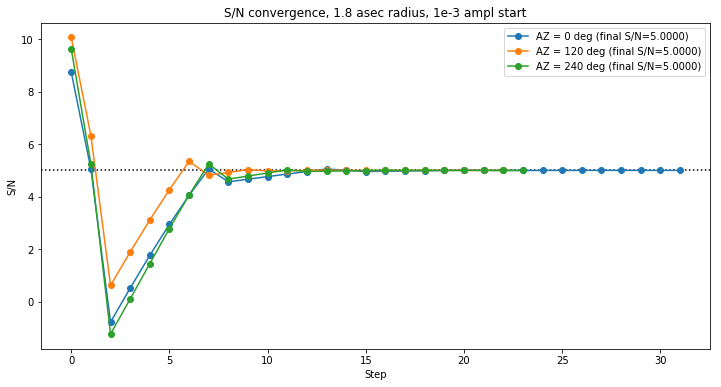

In [35]:
f, (ax1) = plt.subplots(1, 1, figsize=(12,6), sharey=True)

ax1.axhline(y=5, linestyle=":", color="k")
ax1.plot(test_rad180_az000["inject_iteration"].dropna(),test_rad180_az000["s2n"].dropna(), marker='o', 
         label="AZ = 0 deg (final S/N=5.0000)")
ax1.plot(test_rad180_az120["inject_iteration"].dropna(),test_rad180_az120["s2n"].dropna(), marker='o', 
         label="AZ = 120 deg (final S/N=5.0000)")
ax1.plot(test_rad180_az240["inject_iteration"].dropna(),test_rad180_az240["s2n"].dropna(), marker='o', 
         label="AZ = 240 deg (final S/N=5.0000)")
#ax1.set_ylim([-0.001,0.005])
ax1.set_xlabel("Step")
ax1.set_ylabel("S/N")
ax1.set_title("S/N convergence, 1.8 asec radius, 1e-3 ampl start")
ax1.legend()

f.show()
plt.savefig("junk.pdf")